# Seattle Airbnb

My significant foci are listing and calendar to display data from my business understanding.

*   Read dataset - read csv files to pandas dataframe.
*   Data manipulation - data cleaning and data wrangling to make quality data to visualization .
*   Exploratory data analysis (EDA) - Data visualizations that can answer business questions.





## Read dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
# calendar data
df_calender = pd.read_csv('calendar.csv')
df_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
# listings data
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [4]:
# reviews data
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Data manipulation


#### Calendar data

In [5]:
# show number of null values
df_calender.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [6]:
# total data in df_calender
len(df_calender)

1393570

In [7]:
# check duplicated values in all columns
df_calender[df_calender.duplicated()]

,listing_id,date,available,price


In [8]:
df_calender.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [9]:
# So we must convert date column type to date 
df_calender['date'] = pd.to_datetime(df_calender['date'])

# and convert listing_id type to string
df_calender['listing_id'] = df_calender['listing_id'].astype(str)

In [10]:
d = {'t': 'Available', 'f': 'Not available'}
df_calender["available"] = df_calender["available"].map(d)

In [11]:

# remove the symbols in price
def remove_symbol(price):

    if type(price) is str:
        return price.replace("$", "")
    return price
    
df_calender['price'] = df_calender['price'].apply(lambda x: remove_symbol(x))

# convert the price type to numberic
df_calender['price'] = pd.to_numeric(df_calender['price'], errors='coerce')
df_calender['price'] = df_calender['price'].fillna(df_calender.groupby('listing_id')['price'].transform('mean'))

# and the nan value left were replaced by 0
df_calender['price'].fillna(0, inplace=True)


In [12]:
df_calender.sample(10)

,listing_id,date,available,price
829919,7922663,2016-10-04,Not available,49.000000
594811,9533648,2016-08-17,Available,103.000000
996778,6481695,2016-11-27,Available,99.000000
1153504,8423118,2016-04-17,Not available,95.282609
796941,4526737,2016-05-29,Not available,95.107527
1449,7421966,2016-12-23,Available,100.000000
885778,8385444,2016-10-18,Available,67.000000
628976,7452021,2016-03-25,Available,125.000000
518279,10235014,2016-12-13,Not available,250.000000
1263025,1145148,2016-05-08,Available,250.000000


In [13]:
df_calender['year'] = df_calender.date.dt.year
df_calender['year'].value_counts()

2016    1385934
2017       7636
Name: year, dtype: int64

In [14]:
## Get data only in 2016 and drop no price
df_calender = df_calender[df_calender['year'] == 2016]
df_calender = df_calender[df_calender['price'] != 0]

#### Reviews data

In [15]:
# sneak peek dataframe
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [16]:
df_reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [17]:
df_reviews['listing_id'] = df_reviews['listing_id'].to_string()
df_reviews['id'] = df_reviews['id'].to_string()

In [18]:
# Check null
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [19]:
# drop review_id and reveiew_name 
df_reviews = df_reviews.drop(['reviewer_id', 'reviewer_name'], axis=1)

# reomove comments row
df_reviews = df_reviews.dropna(subset=['comments'])

#### Listing data

In [20]:
# sneak peek dataframe
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [21]:
# Select only interest columns
df_listings = df_listings[['id','host_response_time','host_response_rate','accommodates','bathrooms','bedrooms','beds','price','weekly_price','monthly_price'
,'cleaning_fee','extra_people','minimum_nights','review_scores_rating','instant_bookable']]

In [22]:
# convert id type to string
df_listings['id'] = df_listings['id'].to_string()

In [23]:
df_listings['beds'].mode()

0    1.0
dtype: float64

In [24]:
# replace nan value with mode
df_listings['beds'] = df_listings['beds'].fillna(df_listings['beds'].mode()[0])

In [25]:
# remove symbol in price
df_listings['price'] = df_listings['price'].apply(lambda x: remove_symbol(x))

# convert the price type to numberic
df_listings['price'] = pd.to_numeric(df_listings['price'], errors='coerce')



In [26]:
# check null value in price column
df_listings[df_listings['price'].isnull()]

,id,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable
3122,0 241032\n1 953595\n2 3...,NaN,NaN,4,1.0,2.0,2.0,NaN,NaN,NaN,NaN,$0.00,1,100.0,f


In [27]:
df_listings = df_listings.dropna(subset=['price'])

In [28]:
# covert percentage to numberic in host_response_rate column
def percent_to_numberic(x):
    if isinstance(x, str):
        return float(x.strip('%'))/100
    return 1

df_listings['host_response_rate'] = df_listings['host_response_rate'].apply(lambda x: percent_to_numberic(x))

## Exploratory data analysis (EDA)


In [29]:
df_calender.head()


,listing_id,date,available,price,year
0,241032,2016-01-04,Available,85.0,2016
1,241032,2016-01-05,Available,85.0,2016
2,241032,2016-01-06,Not available,85.0,2016
3,241032,2016-01-07,Not available,85.0,2016
4,241032,2016-01-08,Not available,85.0,2016


In [30]:
df_reviews.head()

,listing_id,id,date,comments
0,0 7202016\n1 7202016\n2 ...,0 38917982\n1 39087409\n2 ...,2015-07-19,Cute and cozy place. Perfect location to every...
1,0 7202016\n1 7202016\n2 ...,0 38917982\n1 39087409\n2 ...,2015-07-20,Kelly has a great room in a very central locat...
2,0 7202016\n1 7202016\n2 ...,0 38917982\n1 39087409\n2 ...,2015-07-26,"Very spacious apartment, and in a great neighb..."
3,0 7202016\n1 7202016\n2 ...,0 38917982\n1 39087409\n2 ...,2015-08-02,Close to Seattle Center and all it has to offe...
4,0 7202016\n1 7202016\n2 ...,0 38917982\n1 39087409\n2 ...,2015-08-10,Kelly was a great host and very accommodating ...


In [31]:
df_listings.head()

,id,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable
0,0 241032\n1 953595\n2 3...,within a few hours,0.96,4,1.0,1.0,1.0,85.0,NaN,NaN,NaN,$5.00,1,95.0,f
1,0 241032\n1 953595\n2 3...,within an hour,0.98,4,1.0,1.0,1.0,150.0,"$1,000.00","$3,000.00",$40.00,$0.00,2,96.0,f
2,0 241032\n1 953595\n2 3...,within a few hours,0.67,11,4.5,5.0,7.0,975.0,NaN,NaN,$300.00,$25.00,4,97.0,f
3,0 241032\n1 953595\n2 3...,NaN,1.00,3,1.0,0.0,2.0,100.0,$650.00,"$2,300.00",NaN,$0.00,1,NaN,f
4,0 241032\n1 953595\n2 3...,within an hour,1.00,6,2.0,3.0,3.0,450.0,NaN,NaN,$125.00,$15.00,1,92.0,f


### What is the most occupancy by month in 2016 ?

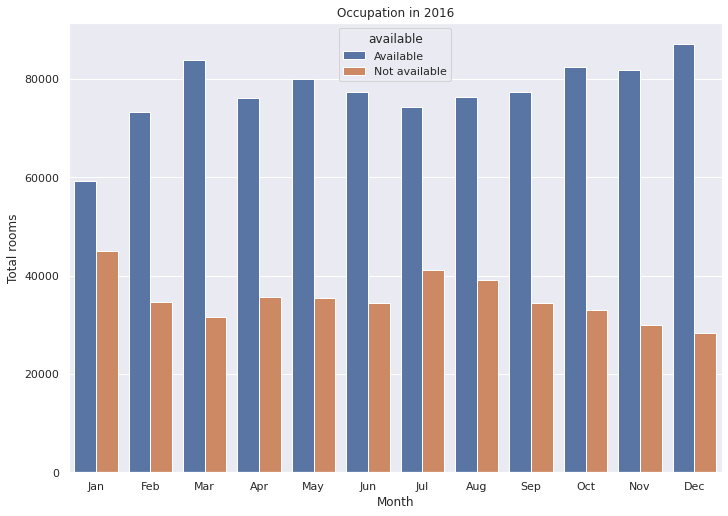

In [32]:
# Set charts size
sns.set(rc={'figure.figsize':(11.7,8.27)})

month = df_calender.date.dt.strftime('%b')
ax = sns.countplot(data = df_calender, x = month, hue = 'available');
ax.set(xlabel='Month', ylabel='Total rooms')
plt.title('Occupation in 2016');

#### Occupancy Percentage

In [33]:
df_group_month = df_calender.groupby(by=[df_calender.date.dt.month, "available"]).agg({'available': 'count'})
df_group_month = df_group_month.rename(columns={'available':'count'})
df_group_month = df_group_month.reset_index()
df_group_month = df_group_month.rename(columns={'date':'month'})

In [34]:
# Crea
df_available = pd.DataFrame(columns=['month', 'percent'])

In [35]:
for month in df_group_month['month'].unique():

  sum_total = df_group_month.loc[df_group_month['month'] == month, 'count'].sum()

  available_total = df_group_month.loc[(df_group_month['month'] == month) & 
                    (df_group_month['available'] == 'Available'), 'count'].sum()

  not_available_total = df_group_month.loc[(df_group_month['month'] == month) & 
                    (df_group_month['available'] == 'Not available'), 'count'].sum()

  available_percent = round(((available_total-not_available_total)/sum_total)*100, 2)

  df_available = df_available.append({'month': month, 'percent': available_percent}, ignore_index=True)


In [36]:
# convert number of month into month name
df_available['month'] = df_available['month'].apply(lambda x: calendar.month_abbr[int(x)])

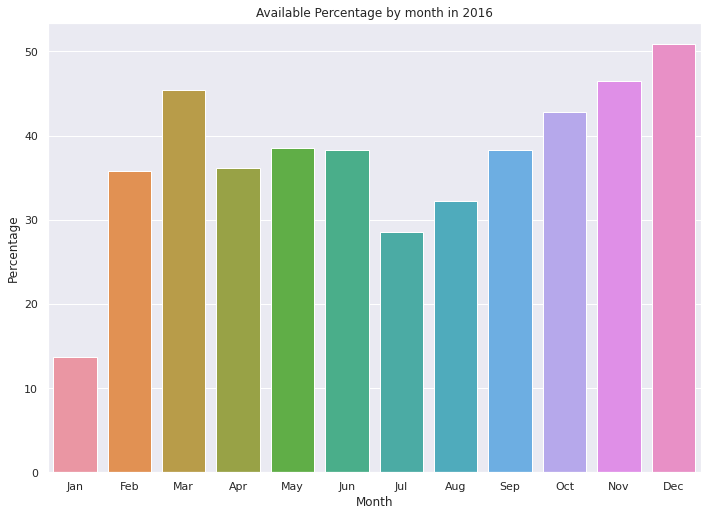

In [37]:

ax = sns.barplot(data = df_available, x = 'month', y='percent');
ax.set(xlabel='Month', ylabel='Percentage')
plt.title('Available Percentage by month in 2016');

### Which month is the most expensive ?

In [38]:
# Grouping month with price mean
month = df_calender.date.dt.month
monthly_avg=df_calender.groupby(month).price.mean()
monthly_avg = monthly_avg.reset_index()

In [39]:
d = {
            1: 'Jan',
            2: 'Feb',
            3: 'Mar',
            4: 'Apr',
            5: 'May',
            6: 'Jun',
            7: 'Jul',
            8: 'Aug',
            9: 'Sep', 
            10: 'Oct',
            11: 'Nov',
            12: 'Dec'
    }
monthly_avg = monthly_avg.rename(columns={"date": "month"})
monthly_avg["month"] = monthly_avg["month"].map(d)

[Text(0, 0.5, 'Average price in USD'), Text(0.5, 0, 'Month')]

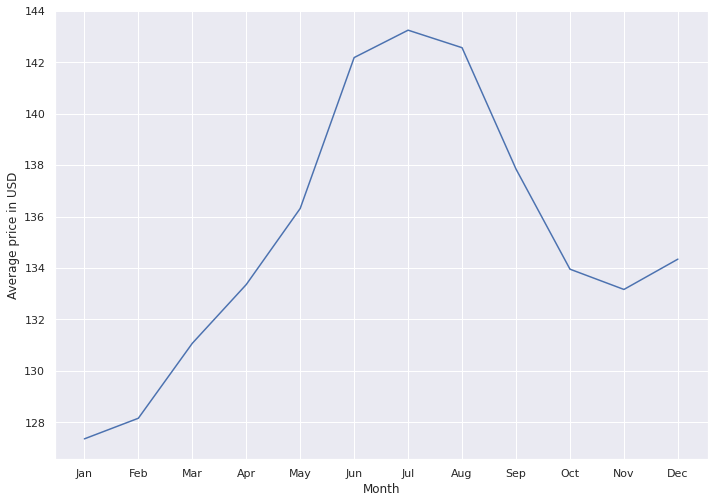

In [40]:
ax = sns.lineplot(x="month", y="price", data=monthly_avg)
ax.set(xlabel='Month', ylabel='Average price in USD')

### Which day is the most costly?

In [41]:
day = df_calender.date.dt.dayofweek
day_avg = df_calender.groupby(day).price.mean()
daily_avg = day_avg.reset_index()

In [42]:
d = {
            0: 'Monday',
            1: 'Tuesday',
            2: 'Wednesday',
            3: 'Thursday',
            4: 'Friday',
            5: 'Saturday',
            6: 'Sunday'
    }
daily_avg["date"] = daily_avg["date"].map(d)

[Text(0, 0.5, 'Average price in USD'), Text(0.5, 0, 'Day')]

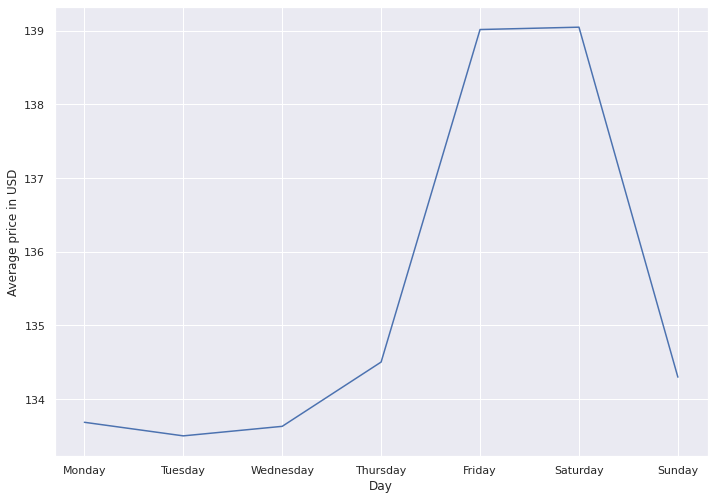

In [48]:
ax = sns.lineplot(x="date", y="price", data=daily_avg)
ax.set(xlabel='Day', ylabel='Average price in USD')

### Is the host respond to you appropriately?

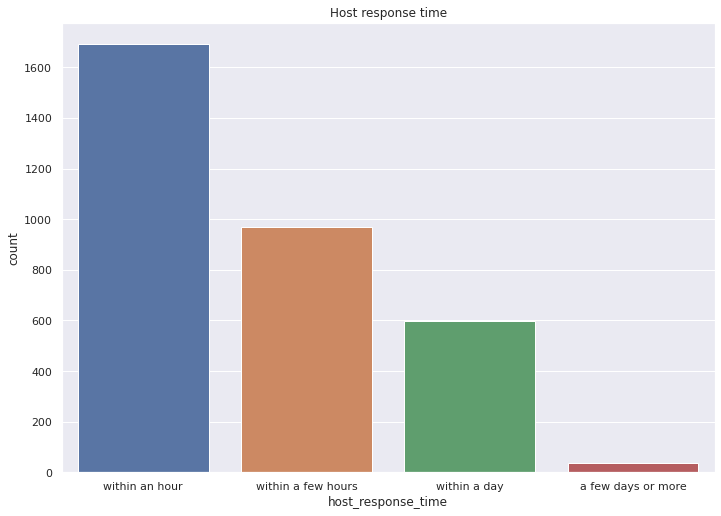

In [44]:
cat_order = df_listings['host_response_time'].value_counts().index
sns.countplot(data = df_listings, x = 'host_response_time',  order=cat_order)
plt.title('Host response time');

[Text(0, 0.5, 'Response rate'), Text(0.5, 0, 'Response time')]

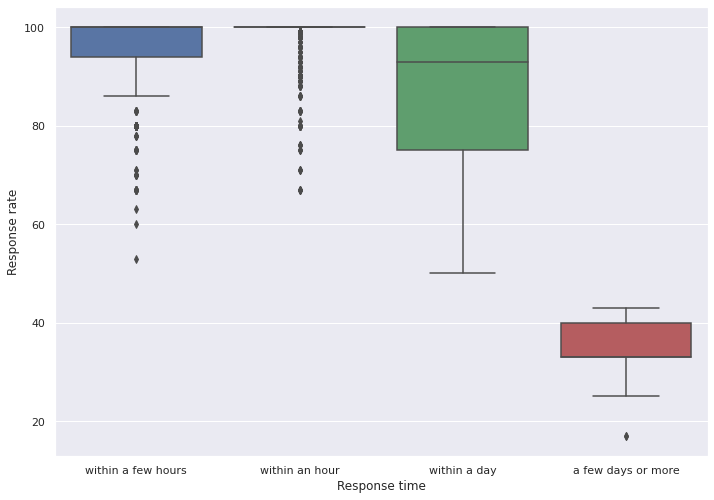

In [45]:
response_rate_percent = df_listings['host_response_rate']*100
ax = sns.boxplot(x="host_response_time", y=response_rate_percent,
            data=df_listings)

ax.set(xlabel='Response time', ylabel='Response rate')


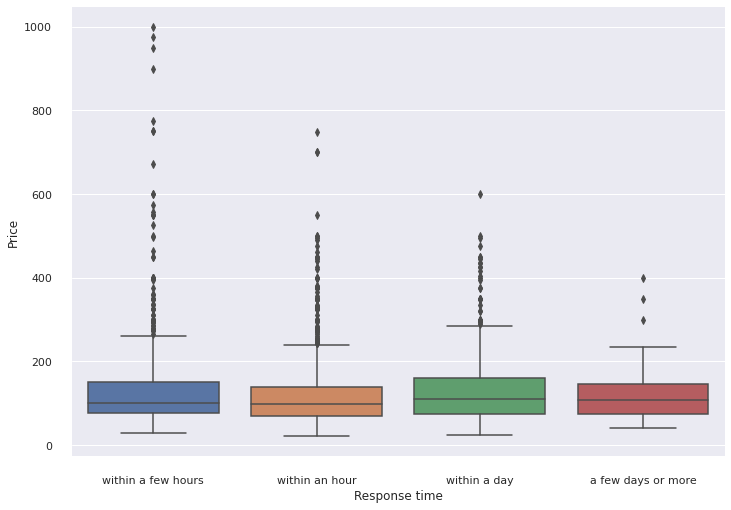

In [46]:
ax = sns.boxplot(x="host_response_time", y="price",
            data=df_listings)
ax.set(xlabel='Response time', ylabel='Price')
sns.despine(offset=10, trim=True)

#### What features were affected the price?

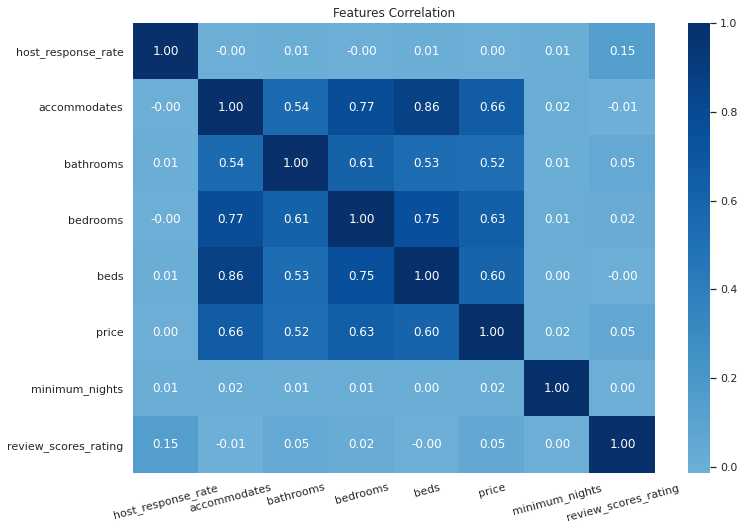

In [47]:
corr = df_listings.corr()
kot = corr[corr.apply(lambda x: abs(x)>=0)]

sns.heatmap(kot, annot = True, fmt = '.2f', center = 0, cmap="Blues")
plt.title('Features Correlation');
plt.xticks(rotation = 15);